In [48]:
'''PORTSCAN ANALYSIS  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'''

'PORTSCAN ANALYSIS  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'

In [9]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             286467 non-null  Int64  
 1    Flow Duration                286467 non-null  Int64  
 2    Total Fwd Packets            286467 non-null  Int64  
 3    Total Backward Packets       286467 non-null  Int64  
 4   Total Length of Fwd Packets   286467 non-null  Int64  
 5    Total Length of Bwd Packets  286467 non-null  Int64  
 6    Fwd Packet Length Max        286467 non-null  Int64  
 7    Fwd Packet Length Min        286467 non-null  Int64  
 8    Fwd Packet Length Mean       286467 non-null  Float64
 9    Fwd Packet Length Std        286467 non-null  Float64
 10  Bwd Packet Length Max         286467 non-null  Int64  
 11   Bwd Packet Length Min        286467 non-null  Int64  
 12   Bwd Packet Length Mean       286467 non-nul

In [14]:
dfn.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7595.10464,67.122468,15075.5,104051.3997,948537,0,1266342,31658.55,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.37672,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7289.93681,64.425518,15706.58333,104861.8701,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.34968,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,12500.0,160.0,0.0,160,160,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6250.0,6250.0,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899,956551,0,1303488,32587.2,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.22124,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,38961.03896,38.5,14.849242,49,28,0,0.0,0.0,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12987.01299,25974.02597,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
# all_data.csv',"
f = open('all_data.csv', 'a').write(dfn) 
# dfn.to_csv('all_data.csv',"a", encoding='utf-8')

TypeError: write() argument must be str, not DataFrame

In [29]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

17900       BENIGN
183230    PortScan
6943        BENIGN
41290       BENIGN
211757    PortScan
170683    PortScan
185426    PortScan
284042      BENIGN
203080    PortScan
223189    PortScan
Name:  Label, dtype: string

In [30]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN      127537
PortScan    158930
Name:  Label, dtype: int64

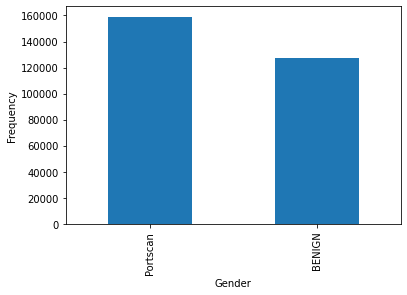

In [31]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Portscan','BENIGN'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.5547933967961406
(286467, 76)
(286467, 76) 120000000.0
0 --- 65389.0
1 --- 119999952.0
2 --- 3119.0
3 --- 3635.0
4 --- 232349.0
5 --- 7150819.0
6 --- 13929.0
7 --- 1472.0
8 --- 3412.938720703125
9 --- 3541.466552734375
10 --- 10136.0
11 --- 1460.0
12 --- 2442.523193359375
13 --- 2628.88330078125
14 --- 98100000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 98100000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 81200000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 81300000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 0.0
31 --- 0.0
32 --- 79632.0
33 --- 81288.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 289.0
37 --- 13929.0
38 --- 1588.0
39 --- 2497.02001953125
40 --- 6235108.5
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 0.0
48 --- 1.0
49 --- 124.0
50 --- 2068.0
51 --- 3412.938720703125
52 --- 2442.523193359375
53 --- 79632.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
58 --- 0.0
59 --- 0.0
60 

In [33]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.80, random_state = 42)


print(x_train.shape,len(y_train),x_test.shape,len(y_test))

x_train.columns

(57293, 76) 57293 (229174, 76) 229174


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [40]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 30)
dtc = dtc.fit(x_train,y_train)

(57293, 76) (57293,)


In [36]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [44]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,30):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

29
29


No handles with labels found to put in legend.


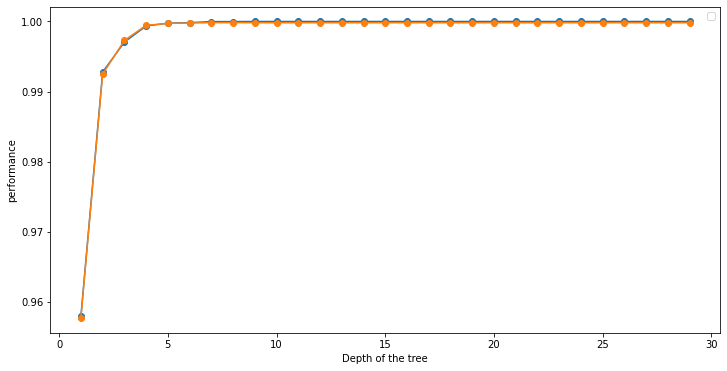

In [45]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [14]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.999746917189559
0.999746917189559
0.9997718906333574


In [37]:
print(dtc.feature_importances_)
dtc.feature_names = list(x_train.columns)
f_names = dtc.feature_names
dtc.predict(x_train[f_names])
len(x_train.columns)

[2.14603495e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.40569991e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.74366846e-04 1.23490411e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.40811408e-05 0.00000000e+00 0.00000000e+00
 1.24712203e-04 1.83463548e-03 0.00000000e+00 3.96902787e-03
 6.62138121e-04 6.52340754e-05 7.56019911e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.54472327e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.40867885e-04 1.48419361e-04
 0.00000000e+00 0.00000000e+00 1.11219322e-03 6.20387284e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.77101887e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.30694948e-01 0.00000000e+00
 0.00000000e+00 2.67032957e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.01938148e-02 5.65361987e-05
 0.00000000e+00 0.000000

76

In [38]:
zip(x_train.columns, dtc.feature_importances_)

In [39]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

# print(x_train.columns, dtc.feature_importances_)

[(0.8405699909128113, 'Total Length of Fwd Packets'),
 (0.13069494826672712, ' Average Packet Size'),
 (0.010193814845226372, ' Subflow Bwd Packets'),
 (0.006203872843332347, ' Packet Length Std'),
 (0.003969027869004874, ' Fwd IAT Mean'),
 (0.002670329574254757, ' Fwd Header Length.1'),
 (0.001834635475476011, ' Flow IAT Min'),
 (0.0011121932233333475, ' Packet Length Mean'),
 (0.0007771018873037396, ' PSH Flag Count'),
 (0.0006621381206653741, ' Fwd IAT Std'),
 (0.00027436684649096007, ' Fwd Packet Length Mean'),
 (0.00021460349468718968, ' Destination Port'),
 (0.00014841936127712237, ' Bwd Packets/s'),
 (0.00014086788496220573, 'Fwd Packets/s'),
 (0.00012471220295043637, ' Flow IAT Max'),
 (0.00012349041075904556, ' Fwd Packet Length Std'),
 (7.560199112907978e-05, ' Fwd IAT Min'),
 (7.048865151098848e-05, 'Idle Mean'),
 (6.5234075389459e-05, ' Fwd IAT Max'),
 (5.6536198670864484e-05, ' Subflow Bwd Bytes'),
 (1.408114076248048e-05, ' Bwd Packet Length Std'),
 (3.54472327485328e-06,

In [41]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))

---------------------------Random Forest CLassifier------------------
0.9999127300653652


In [42]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.18534872653129636, ' Packet Length Mean'),
 (0.16827499007053454, ' Avg Fwd Segment Size'),
 (0.1324695206152053, ' Bwd Packets/s'),
 (0.12742401767476597, ' PSH Flag Count'),
 (0.12065546987665461, ' Packet Length Variance'),
 (0.07316216581382733, ' Total Fwd Packets'),
 (0.05433725102992604, 'Init_Win_bytes_forward'),
 (0.03718255847738085, ' Fwd IAT Min'),
 (0.026178198267986008, 'Bwd Packet Length Max'),
 (0.019062563361080462, ' Fwd IAT Mean'),
 (0.01682013004706295, ' Packet Length Std'),
 (0.016756333316397705, ' Average Packet Size'),
 (0.0033273694378279975, ' Fwd Header Length.1'),
 (0.0024568353619204494, ' Destination Port'),
 (0.0020052085378139727, ' Bwd IAT Std'),
 (0.001599470563836342, ' Init_Win_bytes_backward'),
 (0.001354425937029121, 'Fwd Packets/s'),
 (0.0012736944407162071, ' Fwd Packet Length Min'),
 (0.0009620188699062341, ' Flow Duration'),
 (0.0006930724696867113, ' Avg Bwd Segment Size'),
 (0.0006767074858979562, ' Fwd Header Length'),
 (0.0006406569033

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

[(0.33682715745514447, ' Fwd Packet Length Max'),
 (0.3354410254930377, ' Subflow Fwd Bytes'),
 (0.16800108963105218, 'Total Length of Fwd Packets'),
 (0.07796354710299223, ' Average Packet Size'),
 (0.02671477834255699, ' Bwd Packet Length Mean'),
 (0.026503543925079125, ' Bwd Packet Length Min'),
 (0.004108006824333444, ' Subflow Bwd Packets'),
 (0.0036613987444944988, ' Flow IAT Min'),
 (0.0026473132365254087, ' Fwd Header Length'),
 (0.0021831229036195793, ' Packet Length Std'),
 (0.002129836292441696, ' Total Length of Bwd Packets'),
 (0.001769084971624036, ' Total Backward Packets'),
 (0.0017338061990861133, ' Fwd IAT Mean'),
 (0.0015638210476289368, ' Packet Length Variance'),
 (0.0012228643835088776, ' Fwd Header Length.1'),
 (0.0012072910460888375, ' Min Packet Length'),
 (0.0009162894853063109, ' Flow IAT Mean'),
 (0.0008979154969801631, ' Bwd Packets/s'),
 (0.0007270416899918046, ' Fwd IAT Max'),
 (0.0006987758078069218, ' Fwd Packet Length Mean'),
 (0.0006500605529296347, '

In [47]:
print(regressor.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9992954867369991
0.999746917189559
0.9997718906333574
